# Ejercicio 3: "Dogs vs. Cats"

## Descarga de datos y preparación de datos
El código para descargar los datos es el siguiente:

In [ ]:
!wget --no-check-certificate \
https://www.dropbox.com/s/sshnskxxolkrq9h/cats_and_dogs_small.zip?dl=0 \
-O /tmp/cats_and_dogs_small.zip

--2022-03-01 15:51:27--  https://www.dropbox.com/s/sshnskxxolkrq9h/cats_and_dogs_small.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sshnskxxolkrq9h/cats_and_dogs_small.zip [following]
--2022-03-01 15:51:28--  https://www.dropbox.com/s/raw/sshnskxxolkrq9h/cats_and_dogs_small.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca6c27a5a8363f3cbe7cbcbfc8b.dl.dropboxusercontent.com/cd/0/inline/BgrqYsgA9eO0OCjX6GHhOYeAHo9EUdtBaMYAlyOlGgxCwK6mtmKdN3cBfNwe_H1JWzGoCxkZCjqISk68OPZ9Y97j_FZQWBsCqMiMsV7CO431ML6y0W6xqZDY_XcVMjTU988GF6bYcWTBbRqzT7YidT1B/file# [following]
--2022-03-01 15:51:28--  https://uca6c27a5a8363f3cbe7cbcbfc8b.dl.dropboxusercontent.com/cd/0/inline/BgrqYsgA9eO0OCjX6GHhOYeAHo9EUdtBaMYAlyOlGgxCwK6mt

Una vez descargados los datos, podemos usar librerías de sistema operativo
para tener acceso al sistema de archivos y poder descomprimir los datos:

In [ ]:
import os
import zipfile
local_zip = '/tmp/cats_and_dogs_small.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Debemos generar un *Training dataset* (para entrenar entrenar a la red), un *Validation datasets* (para ver como aprende la red en cada *epoch* y así ajustar los hiperparámetros) y por último un *Test dataset* (encargado de avaluar la red una vez a finalizado el entrenamiento).

El siguiente código realiza esta tarea usando comandos del sistema operativo:

In [ ]:
base_dir = '/tmp/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directorio con las imagenes de training
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio con las imagenes de validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directorio con las imagenes de test
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

En este caso no se etiquetarán explicitamente las imágenes como "gato" o "perro", como hicimos en el ejercicio anterior. En este caso, usaremos una de las utilidades interesantes de Keras (y TensorFlow) es que si organizamos las imágenes en subdirectorios podemos generar las etiquetas automáticamente.

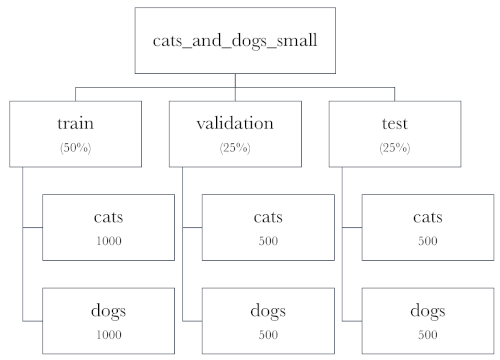

Para facilitar el seguimiento del código del caso de estudio hemos decidido
repartir los datos en “números redondos” sin priorizar la mejor proporción
de repartición para obtener los mejores resultados posibles del modelo.

En resumen: tenemos tres conjuntos de imágenes, 2000 para entrenar, 1000
para validar y 1000 de prueba final respectivamente (50% directorio train,
25% directorio validation y 25% directorio test). Los tres conjuntos de
datos están exactamente balanceados, que aunque no entremos en detalle en
este libro, es un factor importante para garantizar que la Accuracy del modelo
pueda ser una métrica apropiada para evaluar su validez.

Antes de avanzar, comprobamos el contenido de cada directorio:

In [ ]:
# Comprobamos el numero total de imagenes en cada directorio
print('total training cat images :', len(os.listdir(train_cats_dir ) ))
print('total training dog images :', len(os.listdir(train_dogs_dir ) ))
print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))
print('total test cat images :', len(os.listdir( test_cats_dir ) ))
print('total test dog images :', len(os.listdir( test_dogs_dir ) ))
print('-------------------------------')

# Comprobamos el contenido de cada directorio para asegurarnos de que es 
# correcto
train_cat_fnames = os.listdir( train_cats_dir )
print('Training cat frames')
print(train_cat_fnames[:5])

train_dog_fnames = os.listdir( train_dogs_dir )
print('Training dog frames')
print(train_dog_fnames[:5])

validation_cat_fnames = os.listdir( validation_cats_dir )
print('Validation cat frames')
print(validation_cat_fnames[:5])

validation_dog_fnames = os.listdir( validation_dogs_dir )
print('Validation dog frames')
print(validation_dog_fnames[:5])

test_cat_fnames = os.listdir( test_cats_dir )
print('Test cat frames')
print(test_cat_fnames[:5])

test_dog_fnames = os.listdir( test_dogs_dir )
print('Test dog frames')
print(test_dog_fnames[:5])

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500
total test cat images : 500
total test dog images : 500
-------------------------------
Training cat frames
['cat.470.jpg', 'cat.425.jpg', 'cat.66.jpg', 'cat.304.jpg', 'cat.545.jpg']
Training dog frames
['dog.218.jpg', 'dog.112.jpg', 'dog.513.jpg', 'dog.589.jpg', 'dog.665.jpg']
Validation cat frames
['cat.1230.jpg', 'cat.1055.jpg', 'cat.1057.jpg', 'cat.1078.jpg', 'cat.1038.jpg']
Validation dog frames
['dog.1166.jpg', 'dog.1015.jpg', 'dog.1157.jpg', 'dog.1409.jpg', 'dog.1035.jpg']
Test cat frames
['cat.1965.jpg', 'cat.1589.jpg', 'cat.1998.jpg', 'cat.1711.jpg', 'cat.1585.jpg']
Test dog frames
['dog.1867.jpg', 'dog.1840.jpg', 'dog.1609.jpg', 'dog.1743.jpg', 'dog.1512.jpg']


También podemos visualizar las imagenes usando el siguiente código:

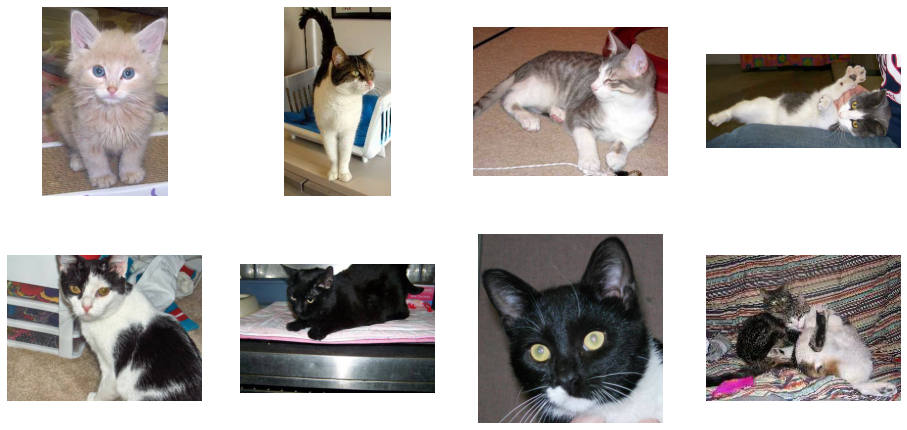

In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
nrows = 4
ncols = 4
pic_index = 0 # Índice para iterar sobre las imagenes
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]
                ]
for i, img_path in enumerate(next_cat_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # no imprimir ejes
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

## Modelo de reconocimiento de imágenes reales

Antes de definir el modelo recordamos que apra entrenar una red neuronal se requiere que los datos de entrada tengan un tamaño uniforme.

Ya en el ejercicio anterior, construimos un modelo basado en redes convolucionales. Pero debido a que estamos tratando imágenes más grandes y un problema más complejo, propondremos una red en consecuencia: tendrán más etapas de *Conv2D + MaxPooling2D*. Esto sirve tanto para aumentar la capacidad de la red como para reducir aún más el tamaño de los mapas de características para que no sean demasiado grandes cuando llegue a la paca final. En concreto en este caso hemos decidido que comienza con entradas de tamaño 150x150 y terminar con mapas de características de tamaño 7x7 justo antes de la capa *Flatten*.

Finalmentes, debido a que requerimos resolver un problema de clasificación binaria, nuestra red propuesta terminará con una capa densa con una sola neurona y una activación sigmoidea. Esta última neurona codificará la probabilidad de que la red esté mirando una clase u otra.

In [ ]:
 import tensorflow as tf

 model = tf.keras.models.Sequential([
# Conv2D -> numero filtros - tamanio de ventana - funcion de activacion - entrada
   tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(512, activation='relu'),
   tf.keras.layers.Dense(1, activation='sigmoid')
 ])

 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

Dado que se trata de un problema de clasificación binaria y nuestra función de activación final es *sigmoid* vamos a entrenar nuestro modelo con una función de coste *binary_crossentropy*. Como optimizador vamos a usar *rmsprop* con un ^learning rate* de 0.001. Finalmente especificamos con el argumento metric que durante el entrenamiento querremos *monitorear* la precisión (*Accuracy*) de la clasificación.

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

### Preprocesado de datos reales con *ImageDataGenerator*

Debemos convertir las imágenes que están en los directorios indicados, convirtiéndolas en tensores *float32* y pasarla a nuestra red neuronal junto a sus respectivas etiquetas. Para ello usaremos un objeto *generator*. Nuestros generadores deberán generar lotes de 20 imágenes de tamaño 150x150 y sus respectivas etiquetas(binarias). Además, deberemos normalizar los datos para que esten entre [0,1]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255.)
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

En esta clase **ImageDataGenerator** permite *instanciar* generadores de lotes de imágenes (y sus etiquetas) a través de los métodos **flow(data, labels)** o **flow_from_directory(directory)** cuando se trata de un directorio, como es nuestro caso. Estos generadores se pueden usar como los métodos del modelo de Keras que aceptan instancias de generadores de datos como argumento como son: **fit_generator()**, **evaluate_generator()** y **predict_generator()**

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                          batch_size=20,
                                          class_mode='binary',
                                          target_size=(150, 150))

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                          batch_size=20,
                                          class_mode = 'binary',
                                          target_size = (150, 150))

test_generator = test_datagen.flow_from_directory(validation_dir,
                                          batch_size=20,
                                          class_mode = 'binary',
                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Modelos a partir de conjuntos de datos pequeños

Es posible entrenar una red neuronal convolucional con solo unas pocas decenas de datos si el modelo es pequeño y la tarea es simple. Para nuestro caso haremos lo siguiente:

Como primer argumento se
especifica el generador de Python que produce lotes de entradas y etiquetas
indefinidamente. Debido a que los datos se generan de manera indefinida, el
modelo de Keras necesita saber cuántas muestras extraer del generador antes
de decidir que ha finalizado una época (epoch): este es el papel del argumento
steps_per_epoch. En nuestro ejemplo, los lotes son de 20 muestras, por
lo que requeriremos 100 lotes hasta que el modelo vea las 2000 imágenes de
entrenamiento.

Cuando usamos el método fit_generator( ) también podemos pasar el
argumento validation_data con el generador de las imágenes que
usaremos para validar. En este caso se requiere indicar con el argumento
validation_steps cuántas muestras deben extraerse del generador en
cada epoch, que serán 50 lotes hasta que se vean las 1000 imágenes.

In [ ]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size
print (steps_per_epoch)
print (validation_steps)

100
50


Ahora solo nos falta definir el argumento *epoch*. Es recomensable empezar con un valor pequeño para probar(dado que cada *epoch* puede tardar varios segundos). Sin embargo, ahora vamos a entrenar con 100 *epochs* para obtener datos que permitan visualizar más fácilmente el *Overfitting* que se podruce en este ejemplo

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch= steps_per_epoch,
      epochs=100,
      validation_data=validation_generator,
      validation_steps= validation_steps,
      verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
100/100 - 23s - loss: 0.6859 - acc: 0.5500 - val_loss: 0.6911 - val_acc: 0.5450 - 23s/epoch - 227ms/step
Epoch 2/10
100/100 - 11s - loss: 0.6516 - acc: 0.6020 - val_loss: 0.6302 - val_acc: 0.6450 - 11s/epoch - 113ms/step
Epoch 3/10
100/100 - 11s - loss: 0.5968 - acc: 0.6835 - val_loss: 0.5973 - val_acc: 0.6720 - 11s/epoch - 111ms/step
Epoch 4/10
100/100 - 11s - loss: 0.5613 - acc: 0.7125 - val_loss: 0.5905 - val_acc: 0.6810 - 11s/epoch - 111ms/step
Epoch 5/10
100/100 - 11s - loss: 0.5444 - acc: 0.7195 - val_loss: 0.5803 - val_acc: 0.6880 - 11s/epoch - 112ms/step
Epoch 6/10
100/100 - 11s - loss: 0.5149 - acc: 0.7395 - val_loss: 0.5789 - val_acc: 0.6840 - 11s/epoch - 113ms/step
Epoch 7/10
100/100 - 11s - loss: 0.4929 - acc: 0.7480 - val_loss: 0.6211 - val_acc: 0.6620 - 11s/epoch - 112ms/step
Epoch 8/10
100/100 - 11s - loss: 0.4689 - acc: 0.7660 - val_loss: 0.5513 - val_acc: 0.6990 - 11s/epoch - 112ms/step
Epoch 9/10
100/100 - 11s - loss: 0.4375 - acc: 0.7970 - val_loss: 0.5641

Hemos indicado con el argumento verbose que se informe por pantalla de
la evolución del entrenamiento. Podemos ver que nos va indicando para cada
epoch cuánto tiempo ha tardado (información muy útil para estimar cuanto
va a tardar aproximadamente realizar todas las epochs) y los valores de 4
métricas por cada epoch: *loss*, *accuracy*, *validation_loss* y
*validation_accuracy*.

### Visualización del comportamiento del entrenamiento
Para ello Keras proporciona la capacidad de registrar todos estos datos
y retornarlos como resultado del método fit().
Concretamente al final de cada *epoch* el modelo almacena en un diccionario
la *Loss* y *Accuracy* de los datos de entrenamiento y validación. Este objeto que
retorna el método contiene un elemento *history*, que es un diccinario que
a su vez contiene los datos que hemos descrito:

In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


A partir de aquí, los datos de este diccionario podemos expresarlos fácilmente
en una gráfica que nos ayudará a ver más fácilmente la evolución de estas
variables. El siguiente código prepara y dibuja un gráfico con toda esta
información:

<Figure size 432x288 with 0 Axes>

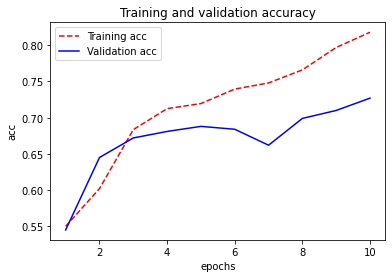

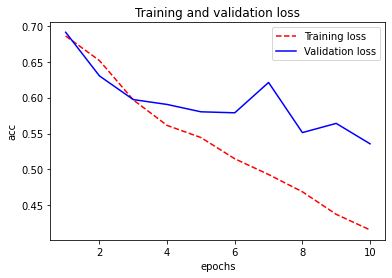

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['acc'] # Obtenemos los valores de training accuracy 
val_acc = history.history[ 'val_acc' ] # Obtenemos los valores de validation accuracy
loss = history.history['loss'] # Obtenemos los valores de training loss
val_loss = history.history['val_loss' ] # Obtenemos los valores de validation loss

epochs = range(1,len(acc)+1,1)

# Creamos una nueva grafica para el parametro Accuracy
plt.plot (epochs, acc, 'r--', label='Training acc' ) # Mostramos training acc
plt.plot (epochs, val_acc, 'b', label='Validation acc') # Mostramos validation acc
plt.title ('Training and validation accuracy') # Titulo de la grafica
plt.ylabel('acc') # ylabel
plt.xlabel('epochs') # xlabel
plt.legend() # Activamos la leyenda

 # Creamos una nueva grafica para el parametro Loss
plt.figure() # Creamos una nueva grafica
plt.plot (epochs, loss, 'r--', label='Training loss')
plt.plot (epochs, val_loss , 'b', label='Validation loss')
plt.title ('Training and validation loss' )
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend()
plt.figure()

En el primer gráfico se presenta la Accuracy obtenida en cada epoch, tanto para
los datos de entrenamiento (Training) como los de validación (validation). En el
segundo gráfico vemos la evolución en cada epoch de la Loss para los dos
conjuntos de datos.
Si miramos el comportamiento general de estas gráficas vemos que son el
característico cuando un modelo presenta Overfitting. Por un lado la Accuracy
de los datos de entrenamiento aumenta linealmente con las epochs, hasta
alcanzar casi el 100%, mientras que la Accuracy de los datos de validación se
detiene alrededor del 80% y a partir de aquí se mantiene constante a lo largo
de las epochs. La Loss de los datos de validación alcanza su mínimo después de
pocos epochs y luego empieza a subir, mientras que la Loss de los datos de
entrenamiento disminuye linealmente hasta llegar a casi 0 donde se
mantiene.
A pesar de todo, los resultados no son tan malos, si consideramos que
tenemos muy pocas imágenes. Si evaluamos el modelo con los datos de Test,
nos lo confirma, obtenemos que este modelo acierta alrededor del 73.9 %:

In [ ]:
test_lost, test_acc= model.evaluate_generator(test_generator)
print ("Test Accuracy:", test_acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Test Accuracy: 0.7269999980926514


Eso muestra que nuestro modelo no es del todo malo (un modelo aleatorio
rondaría sobre el 50%), pero realmente no ganamos nada con el
entrenamiento tan largo, y con muy pocas epochs tendríamos suficiente. Se
puede confirmar en la gráfica de la Loss, donde podemos ver que después de
3 epochs aproximadamente, la Loss de entrenamiento disminuye poco a poco,
es decir el modelo se va ajustando a los datos de entrenamiento, pero que la
Loss de validación va aumentando. Así que nuestro modelo realmente no
necesita entrenar tanto. Como decíamos, este es un ejemplo de Overfitting que
se puede detectar rápidamente viendo las gráficas anteriores: cuando las dos
líneas que representan los datos de entrenamiento y validación divergen
consistentemente.
Recordemos que los motivos que nos mueve construir un modelo es ponerlo
en producción usando el método predict()

Saving gato.jpg to gato (15).jpg
[[1.]]


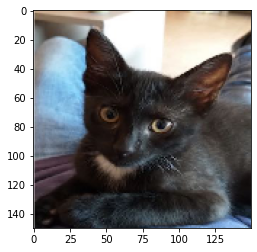

gato.jpg IS A DOG


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded=files.upload() # Nos pide que busquemos las imagenes que quermos en nuestro equipo(.jpg)

for fn in uploaded.keys():
  path = '/content/' + fn # Conseguimos el path de cada imagen (path pensado para Colab)
  '''Cargamos la imagen y la redimensionamos'''
  # Nos devuelve un objeto: PIL Image instance.
  img = tf.keras.preprocessing.image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img) # Convierte un imagen PIL a un 3D Numpy array
  # El modelo acepta inputs con el siguiente formato (None,150,150,3), pero nuestra
  # variable x tiene el siguiente formato: (150,150,3). Es por eso que debemos 
  # aniadirle una dimension mas. Con expand_dims() podemos hacerlo, con el parametro
  # 'axis=0', especificamos en que posicion se va a aniadir. Con 'axis=0' obtendremos
  # (1,150,150,3). Con 'axis=3' obtendremos (150,150,3,1) 
  images = np.expand_dims(x, axis=0)

  classes = model.predict(images)
  print(classes[0])
  plt.imshow(img)
  plt.show()

  if classes[0]>0:
    print( fn + " IS A DOG")
  else:
    print( fn + " IS A CAT")